In [2]:
import pandas as pd
import numpy as np

import seaborn as sns # theme & dataset
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler


In [3]:
data_file_path = './onlinefoods.csv'
df = pd.read_csv(data_file_path)

# 数据集信息
- Age:客户的年龄
- Gender:客户的性别
- Marital Status:客户的婚姻状况
- Occupation:客户的职业
- Monthly Income:客户的月收入
- Educational Qualifications:客户的教育资格
- Family Size:客户家庭的人数
- Latitude:客户所在地的纬度
- Longitude:客户位置的经度
- Pin Code:客户所在地的Pin码
- Output:订单的当前状态（例如，待定、已确认、已交付）
- Feedback:客户收到订单后提供的反馈

In [4]:
df.head(20)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of      Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773 

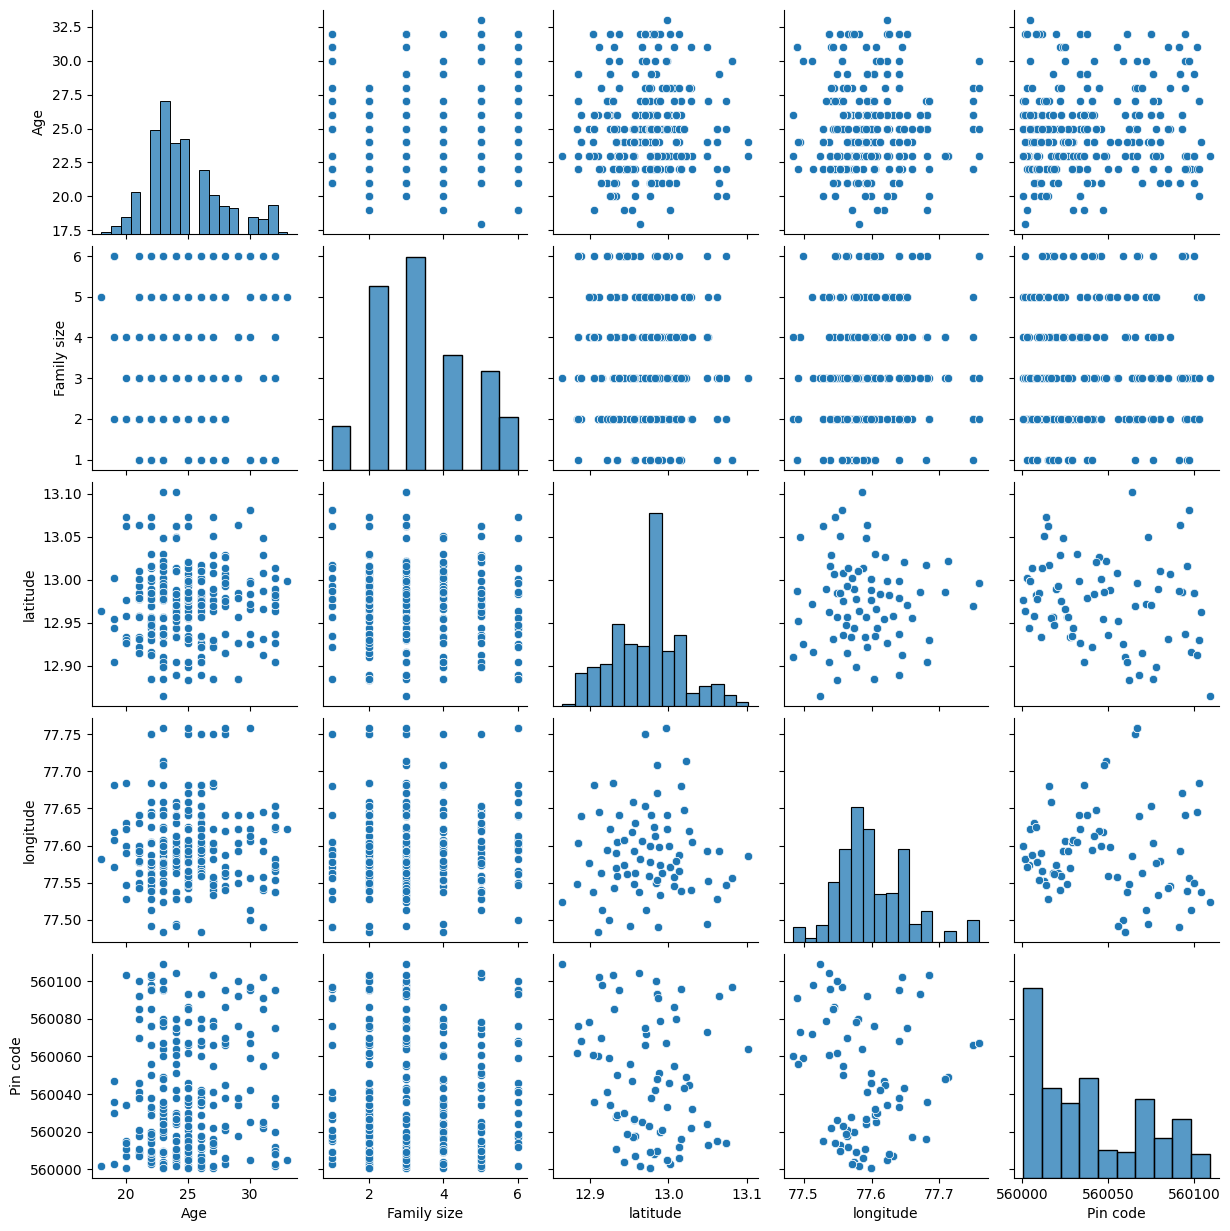

In [12]:
sns.pairplot(df)
plt.show()

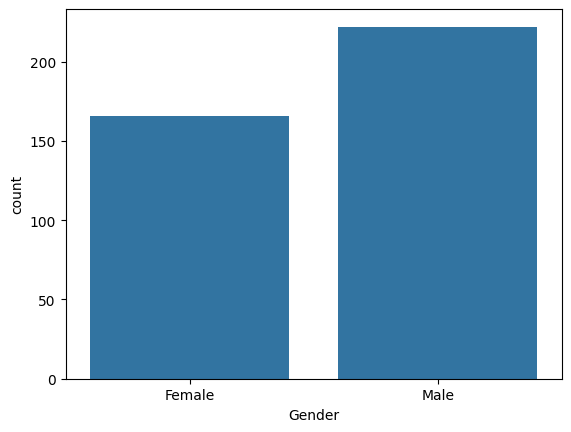

In [8]:
sns.countplot(x='Gender',data=df)
plt.show()

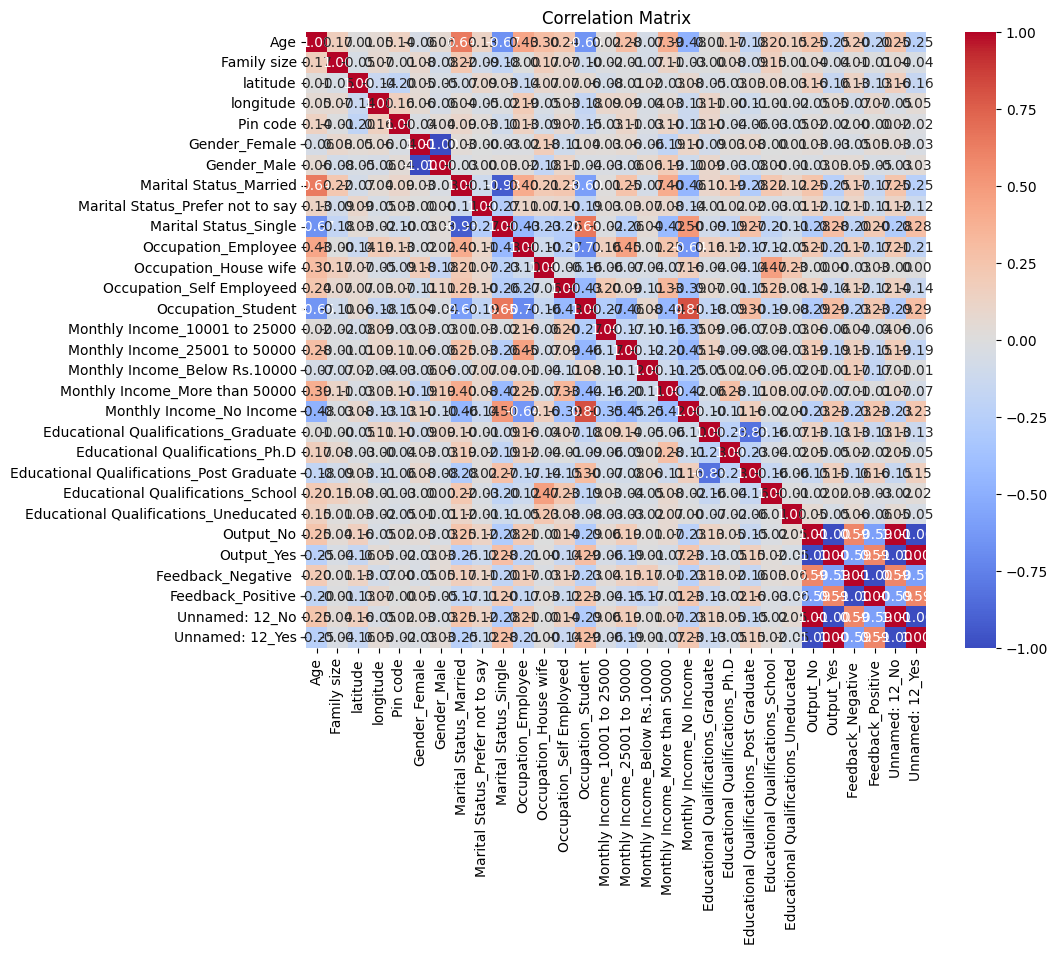

In [9]:
# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(df)

# Calculate correlation matrix
corr = encoded_data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


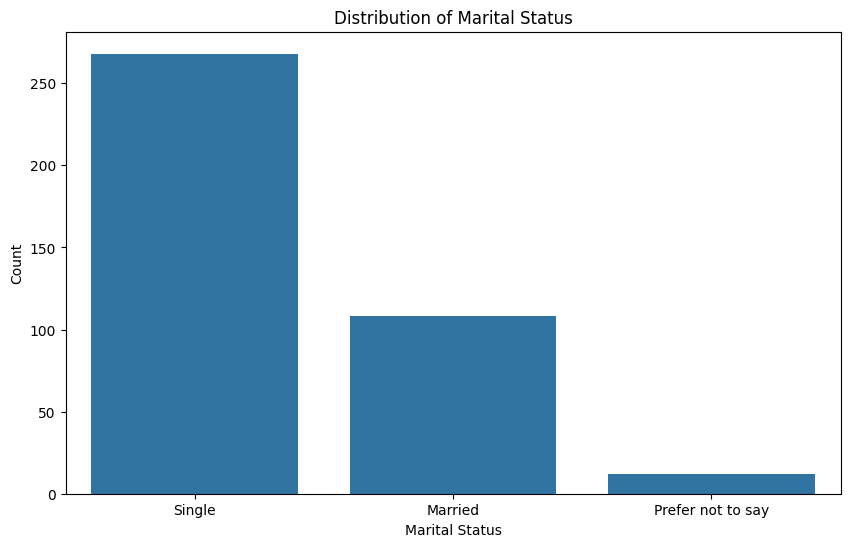

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

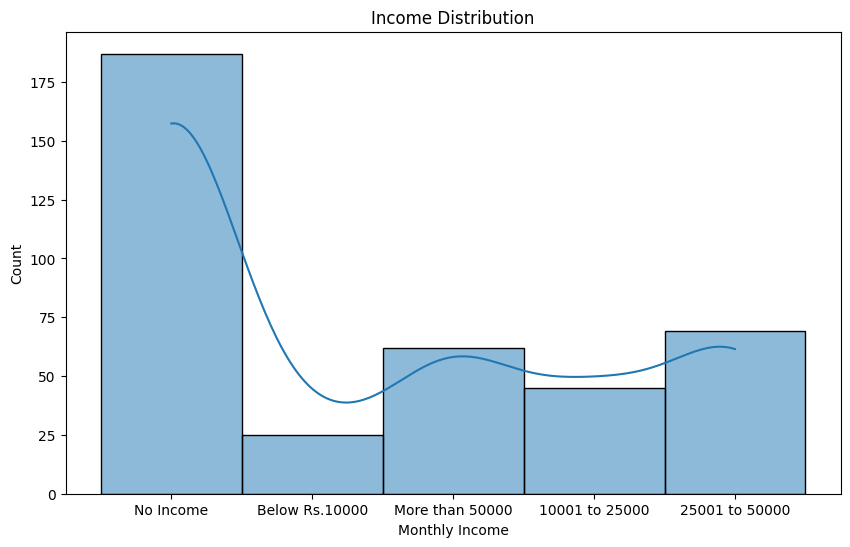

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

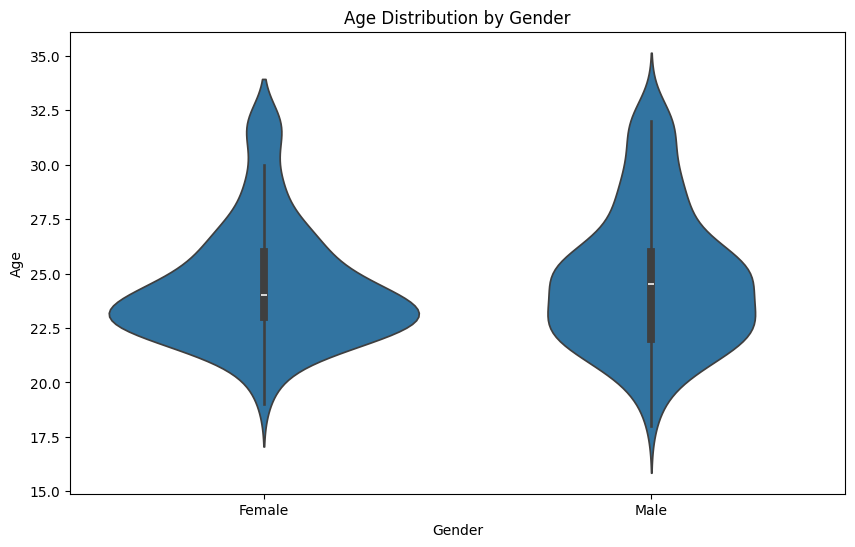

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [11]:
import folium

# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add markers for each data point
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Pin code: {row['Pin code']}").add_to(m)

# Display the map
m

# 数据的清洗与处理

In [15]:
df = df.rename(columns={
    "Marital Status": "Marital_Status",
    "Famil" : "Family_History",
    "Monthly Income" : "Income",
    "Educational Qualifications" : "Education",
    "Family size" : "Family_Size",
    "Pin code" : "Pin"
})

In [16]:
df = df.drop(['Unnamed: 12','Pin', 'latitude', 'longitude'], axis=1)

In [17]:
for col in df.columns:
    # Check if the column has dtype object
    if df[col].dtype == 'object':
        # Initialize LabelEncoder
        le = LabelEncoder()
        # Fit and transform the column
        df[col] = le.fit_transform(df[col])

In [18]:
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [19]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             388 non-null    float64
 1   Gender          388 non-null    float64
 2   Marital_Status  388 non-null    float64
 3   Occupation      388 non-null    float64
 4   Income          388 non-null    float64
 5   Education       388 non-null    float64
 6   Family_Size     388 non-null    float64
 7   Output          388 non-null    float64
 8   Feedback        388 non-null    float64
dtypes: float64(9)
memory usage: 27.4 KB


In [20]:
df_normalized.head()

,Age,Gender,Marital_Status,Occupation,Income,Education,Family_Size,Output,Feedback
0,0.133333,0.0,1.0,1.0,1.0,0.5,0.6,1.0,1.0
1,0.400000,0.0,1.0,1.0,0.5,0.0,0.4,1.0,1.0
2,0.266667,1.0,1.0,1.0,0.5,0.5,0.4,1.0,0.0
3,0.266667,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.266667,1.0,1.0,1.0,0.5,0.5,0.6,1.0,1.0


# 数据可视化

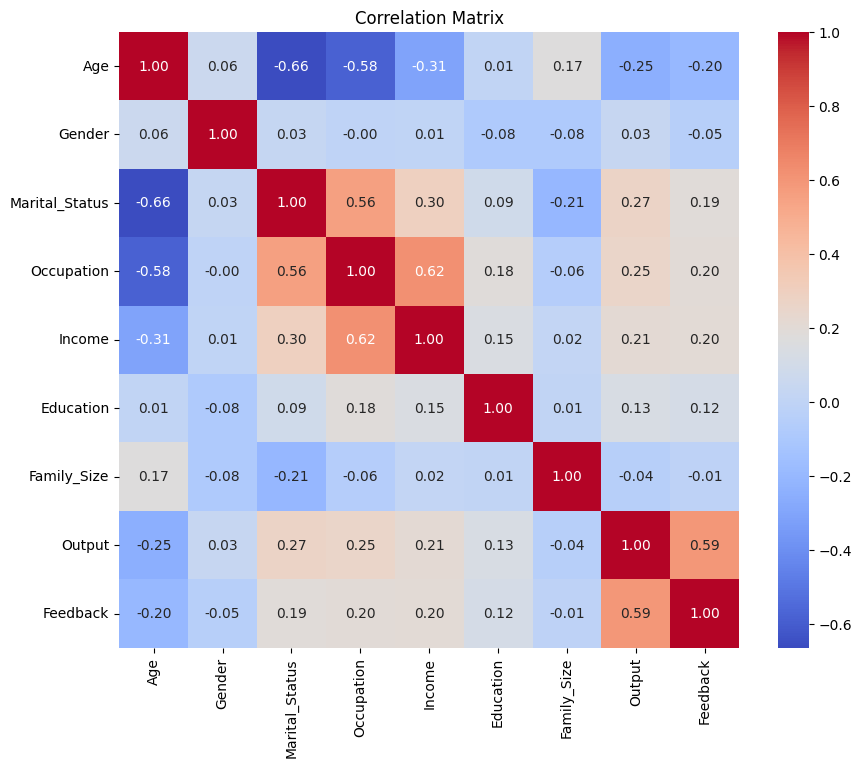

In [21]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
correlation_matrix = df_normalized.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

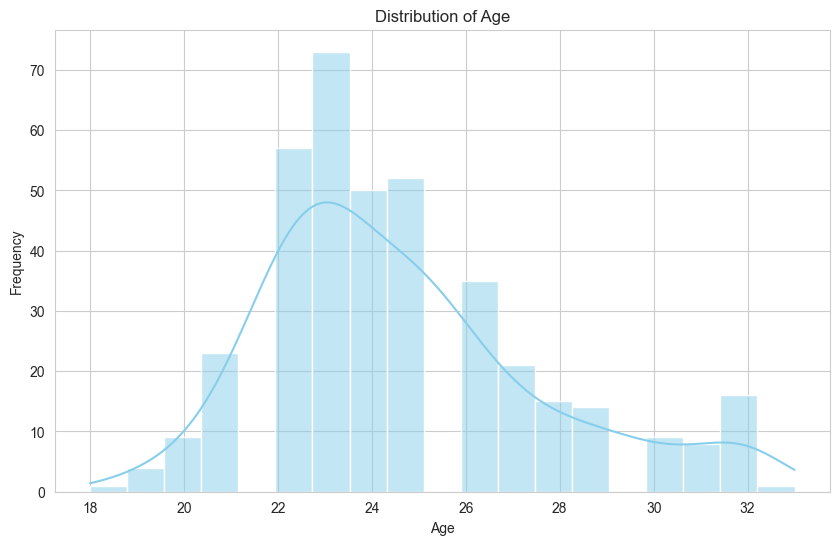

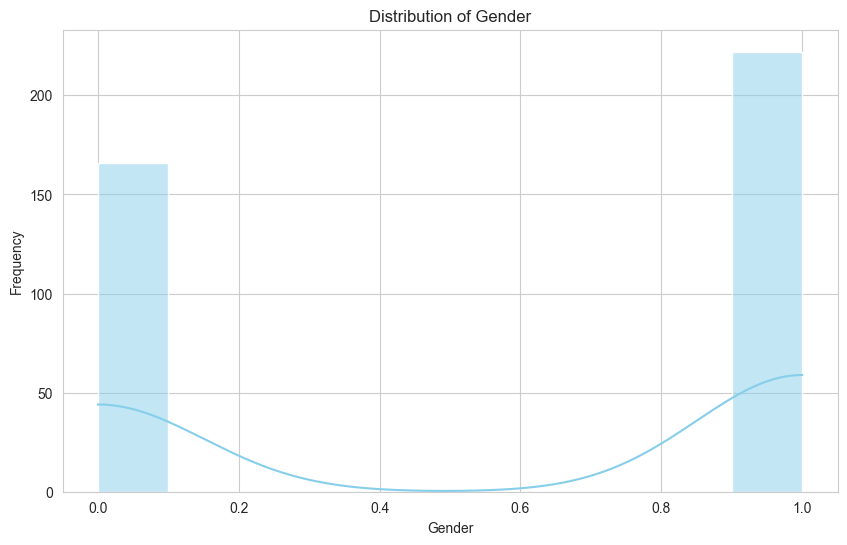

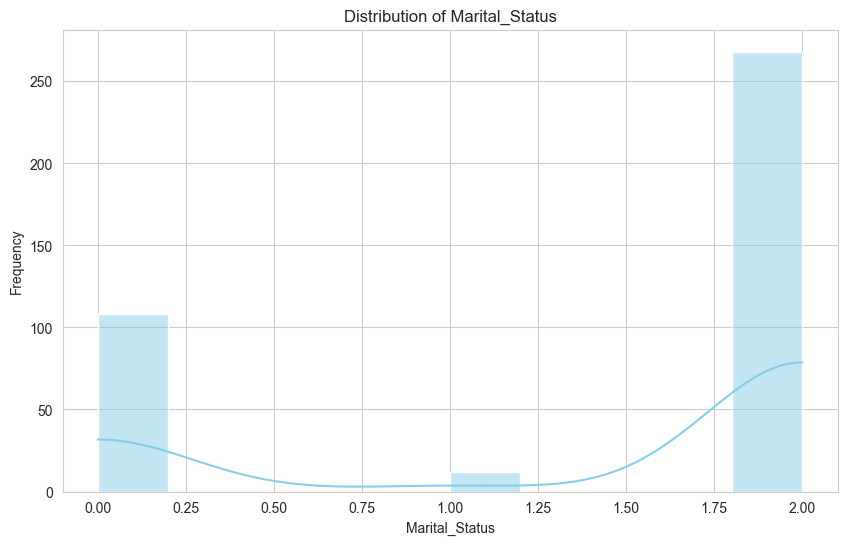

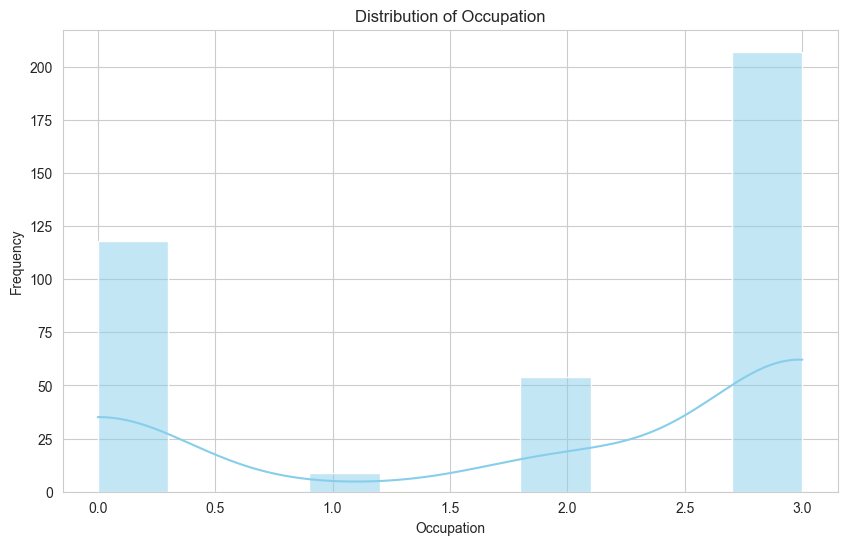

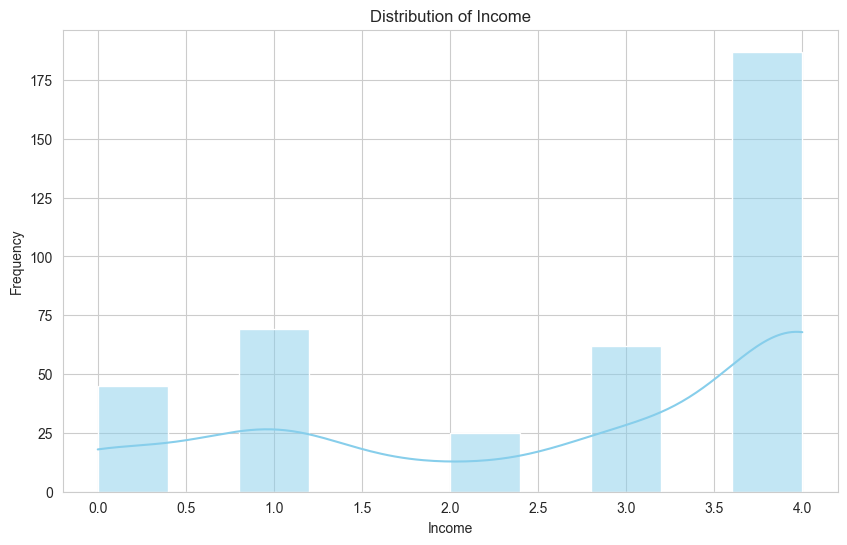

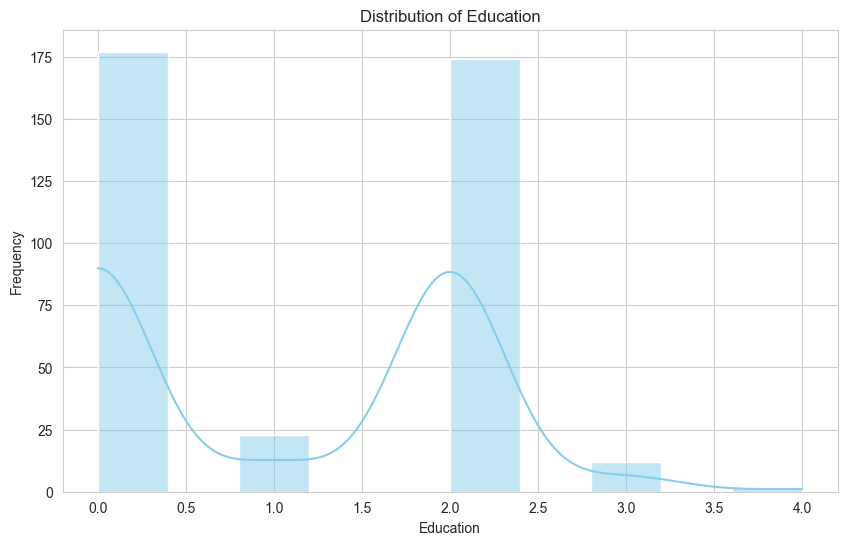

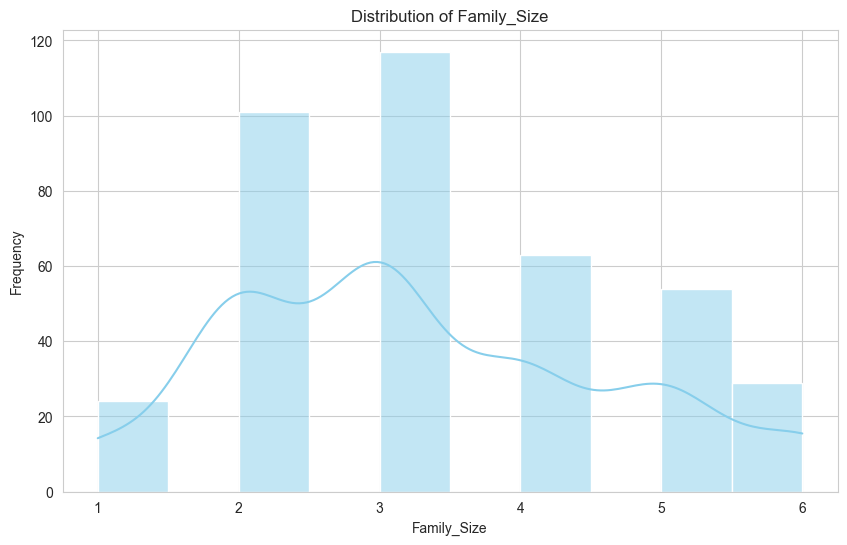

In [12]:
# Define a function for plotting distribution
def plot_distribution(data, column_name, xlabel):
    sns.set_style("whitegrid")  # Set the aesthetic style
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], kde=True, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Assuming df_normalized is your DataFrame
columns_to_plot = df_normalized.columns[:-2]  # Add columns you want to plot
for column in columns_to_plot:
    plot_distribution(df, column, column)

In [13]:
def plot_regression_scatter(data, x_column, y_column, x_label, y_label, title):
    sns.set_style("whitegrid")  # Estetik stil ayarı
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data[x_column], y=data[y_column], scatter_kws={'alpha':0.5, 'color':'green'}, line_kws={'color':'blue'})  # Renk ayarları
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

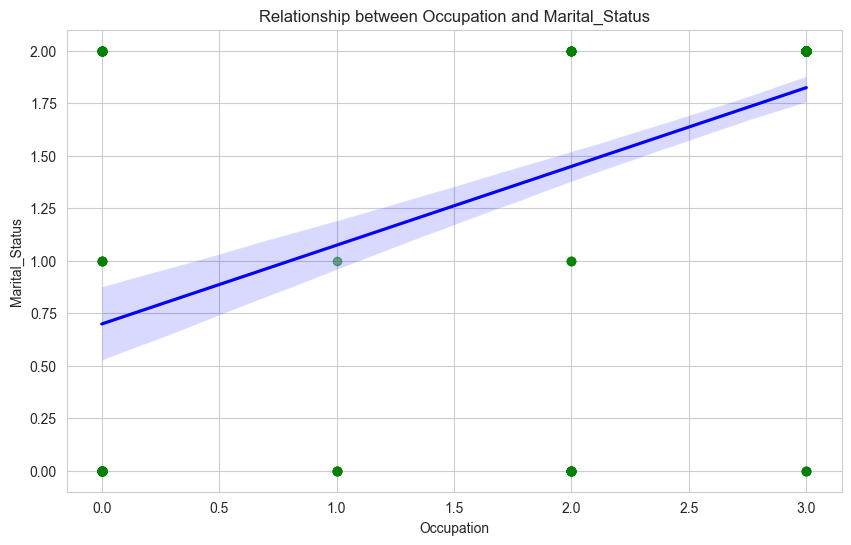

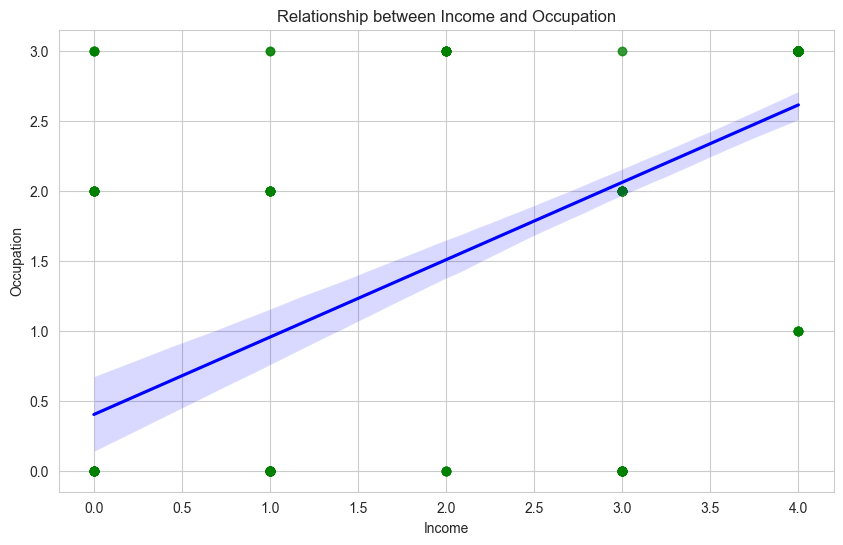

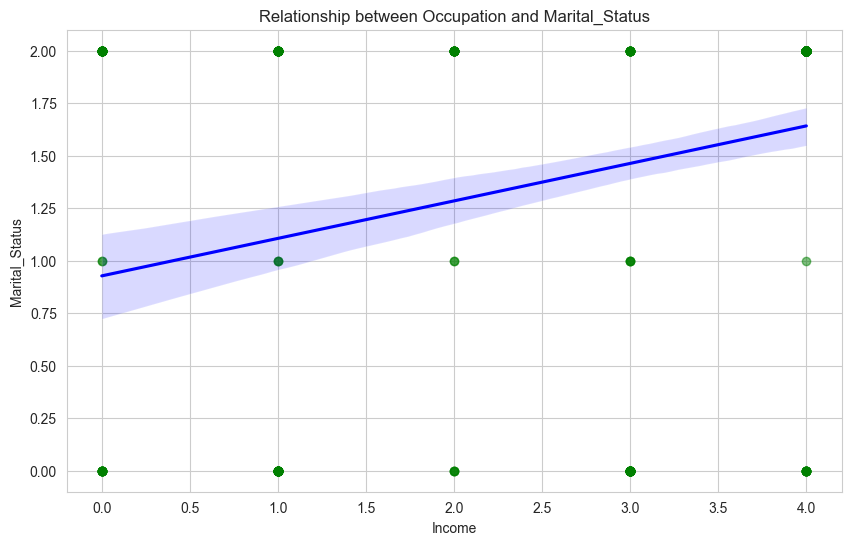

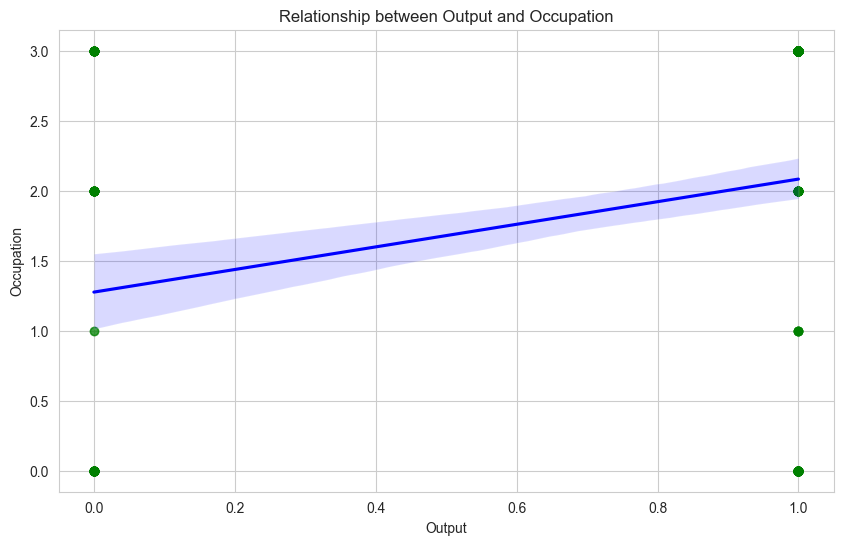

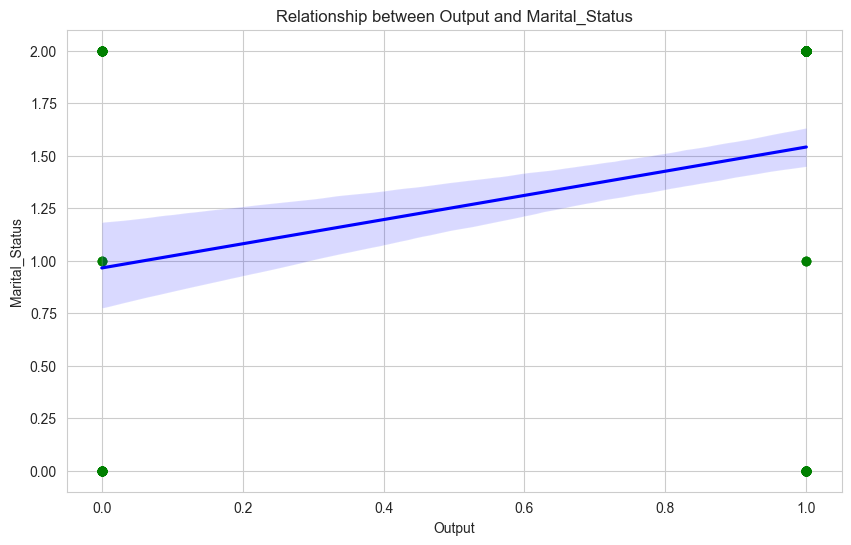

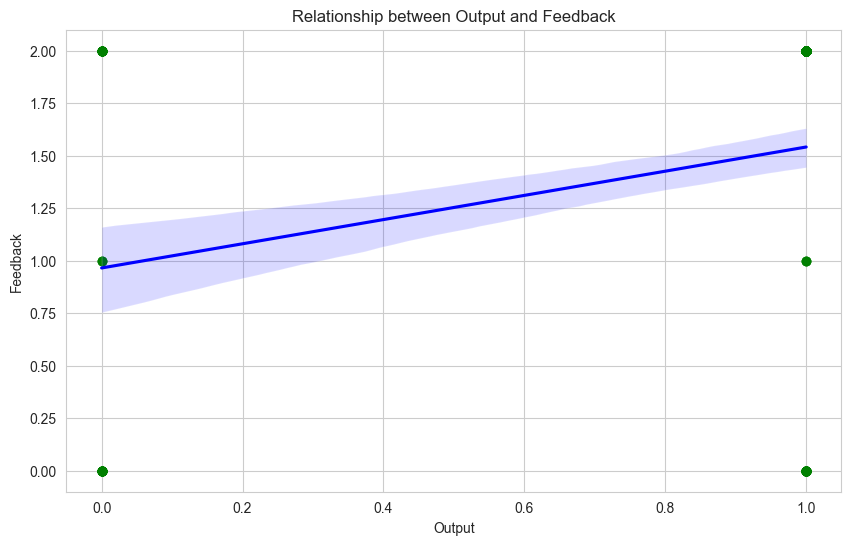

In [14]:
# Occupation and Marital_Status
plot_regression_scatter(df, 'Occupation', 'Marital_Status', 'Occupation', 'Marital_Status', f'Relationship between Occupation and Marital_Status')

# Income and Occupation
plot_regression_scatter(df, 'Income', 'Occupation', 'Income', 'Occupation', f'Relationship between Income and Occupation')

# Income and Marital_Status
plot_regression_scatter(df, 'Income', 'Marital_Status', 'Income', 'Marital_Status', f'Relationship between Occupation and Marital_Status')

# Output and Occupation
plot_regression_scatter(df, 'Output', 'Occupation', 'Output', 'Occupation', f'Relationship between Output and Occupation')

# Output and Marital_Status
plot_regression_scatter(df, 'Output', 'Marital_Status', 'Output', 'Marital_Status', f'Relationship between Output and Marital_Status')

# Output and Feedback
plot_regression_scatter(df, 'Output', 'Marital_Status', 'Output', 'Feedback', f'Relationship between Output and Feedback')

# 运行模型

In [15]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df_normalized.drop(['Feedback'], axis=1)
y = df_normalized['Feedback']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(probability=True), # Set probability=True for SVC
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"-{name} Accuracy: {accuracy * 100:.2f}%")

-Logistic Regression Accuracy: 85.90%
-Decision Tree Accuracy: 85.90%
-Support Vector Classifier Accuracy: 87.18%
-Gradient Boosting Classifier Accuracy: 87.18%
-Random Forest Classifier Accuracy: 85.90%
-AdaBoost Classifier Accuracy: 88.46%
-K-Nearest Neighbors Accuracy: 87.18%
-MLP Classifier Accuracy: 87.18%


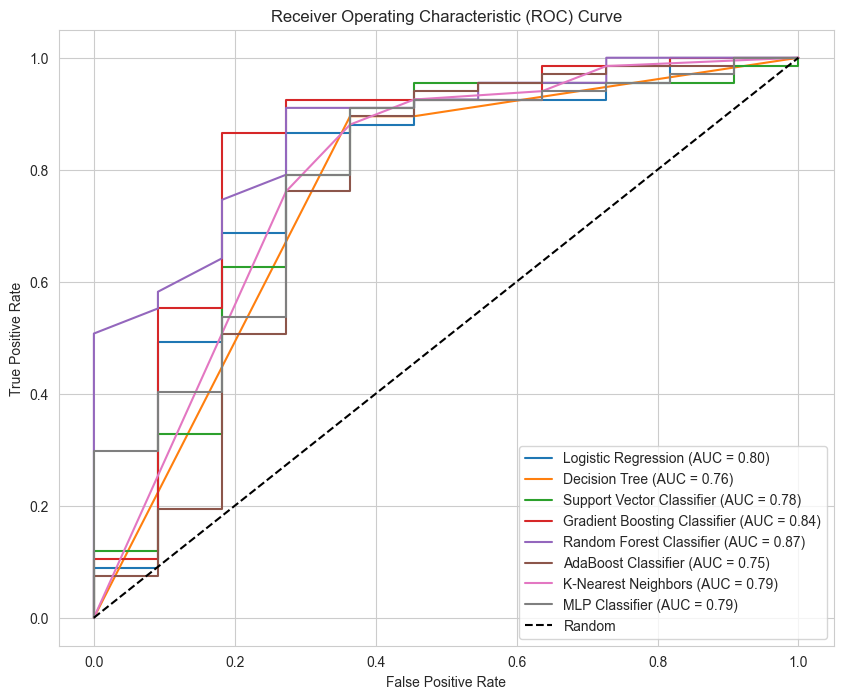

In [16]:
# Train each model and plot ROC curve
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()